# MLTSA vs Feature Permutations

###### *Note that this Jupyter Notebook requires you to have the MLTSA package installed.

As usual with MLTSA experiments we first create the 1D analytical model dataset.

In [3]:
"""First we import our dataset examples"""
from MLTSA_datasets.OneD_pot.OneD_pot_data import potentials #We import the potentials class which will define them.
from MLTSA_datasets.OneD_pot.OneD_pot_data import dataset #We import the dataset class which will hold our potentials.
import matplotlib.pyplot as plt
import numpy as np

#This cell sets the potentials, don't re-run
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
#After defining the desired parameters we define the potentials accordingly
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
# This creates the first dataset of data.
n_features = 180
degree_of_mixing = 2
#We specified the number of features wanted and how much they will mix
oneD_dataset = dataset(pots, n_features, degree_of_mixing)

Defining Potentials: 100%|###########################################################| 25/25 [00:00<00:00, 1667.58it/s]


Once the dataset has been created we generate the data we will use over the comparison

In [4]:

"""Now we generate the trajectories we will use for the whole experiment"""
#Generate the trajectories
n_simulations = 100
n_steps = 250
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)
data_val, ans_val = oneD_dataset.generate_linear(int(n_simulations/2), n_steps)

#Prepare it for training
time_frame = [30, 60] #Same time frame as the sklearn one
X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")
X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

Classifying Simulation Outcomes: 100%|#########################################################| 50/50 [00:00<?, ?it/s]


Generating dataset
Getting simulation labels for the generated data
Generating dataset
Getting simulation labels for the generated data


In [58]:
from MLTSA_sklearn.models import SKL_Train
from sklearn.neural_network import MLPClassifier
from MLTSA_sklearn.MLTSA_sk import MLTSA
from sklearn.inspection import permutation_importance

#For loop for MLTSA and Permutation on MLP

replicas = 100

results = {}
results["MLTSA"] = []
results["Perm"] = []
results["NN"] = []
results["acc"] = []


for R in range(replicas):

    NN = MLPClassifier(random_state=0, verbose=False, max_iter=500)
    trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

    feat_perm = permutation_importance(trained_NN, X, Y, n_repeats=10, random_state=0)

    ADrop_train_avg = MLTSA(data[:,:,time_frame[0]:time_frame[1]], ans, trained_NN, drop_mode="Average")

    results["MLTSA"].append(ADrop_train_avg)
    results["Perm"].append(feat_perm)
    results["NN"].append(trained_NN)
    results["acc"].append([train_acc, test_acc])

Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  8.723722219467163 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  8.208152055740356 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  8.810606718063354 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  8.349275588989258 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  9.417754173278809 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  7.960005283355713 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  8.242988348007202 seconds
Accuracy on Train is 88.62222222222222
Accuracy on Test set is 88.13333333333333
Trained in  7.79642653465271 seconds
Accuracy on Train is 88.62222222222222
Accuracy o

100it [00:08, 12.48it/s]
100it [00:07, 12.85it/s]
100it [00:08, 12.29it/s]
100it [00:08, 11.68it/s]
100it [00:08, 11.95it/s]
100it [00:08, 12.11it/s]
100it [00:07, 13.22it/s]
100it [00:07, 12.98it/s]
100it [00:07, 13.40it/s]
100it [00:07, 13.20it/s]
100it [00:10,  9.13it/s]
100it [00:11,  8.91it/s]
100it [00:11,  9.03it/s]
100it [00:07, 12.53it/s]
100it [00:10,  9.15it/s]
100it [00:10,  9.27it/s]
100it [00:10,  9.30it/s]
100it [00:10,  9.37it/s]
100it [00:10,  9.32it/s]
100it [00:10,  9.22it/s]
100it [00:10,  9.34it/s]
100it [00:10,  9.30it/s]
100it [00:07, 12.78it/s]
100it [00:07, 12.78it/s]
100it [00:07, 13.50it/s]
100it [00:07, 12.58it/s]
100it [00:07, 13.19it/s]
100it [00:07, 13.08it/s]
100it [00:07, 13.07it/s]
100it [00:07, 13.45it/s]
100it [00:07, 13.31it/s]
100it [00:07, 12.81it/s]
100it [00:07, 13.09it/s]
100it [00:07, 13.16it/s]
100it [00:07, 13.32it/s]
100it [00:07, 13.38it/s]
100it [00:07, 13.39it/s]
100it [00:07, 13.51it/s]
100it [00:07, 13.52it/s]
100it [00:08, 11.79it/s]


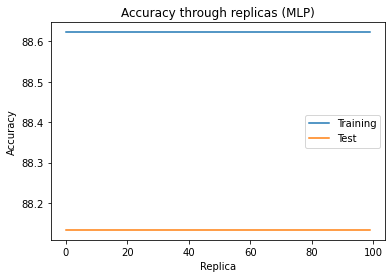

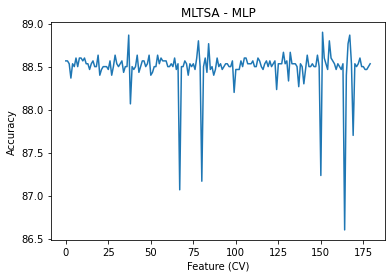

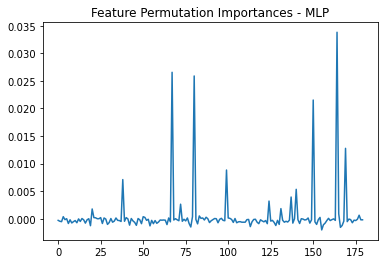

In [59]:
acc = np.array(results["acc"])
adrop = np.array(results["MLTSA"])
permut = np.array(results["Perm"])
permut = [ x.importances_mean for x in permut]

plt.figure()
plt.title("Accuracy through replicas (MLP)")
plt.plot(acc.T[0]*100, label="Training")
plt.plot(acc.T[1]*100, label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(mean)
plt.fill_between(np.arange(len(std)), y1=(mean+std), y2=(mean-std))
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

plt.figure()
plt.title("Feature Permutation Importances - MLP")
plt.plot(np.mean(permut, axis=0))

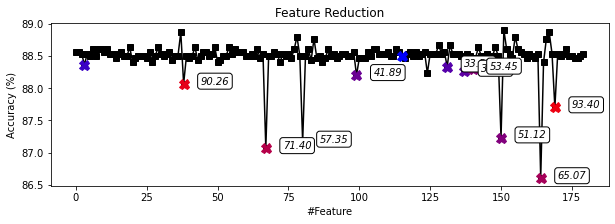

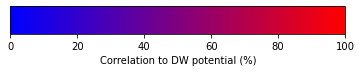

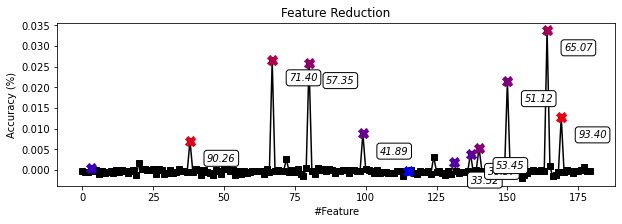

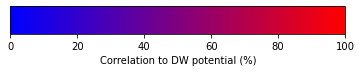

In [60]:
from MLTSA_sklearn.MLTSA_sk import MLTSA_Plot

#We simply get the plot with this
MLTSA_Plot(adrop, oneD_dataset, pots, errorbar=False)

MLTSA_Plot(np.array(permut)/100, oneD_dataset, pots, errorbar=False)

In [61]:
from MLTSA_sklearn.models import SKL_Train
from sklearn.ensemble import GradientBoostingClassifier
from MLTSA_sklearn.MLTSA_sk import MLTSA
from sklearn.inspection import permutation_importance

#For loop for MLTSA and Permutation on GBDT

replicas = 100

results_GB = {}
results_GB["MLTSA"] = []
results_GB["Imp"] = []
results_GB["Perm"] = []
results_GB["NN"] = []
results_GB["acc"] = []

for R in range(replicas):

    GBDT = GradientBoostingClassifier(random_state=0, verbose=False, n_estimators=500)
    trained_GBDT, train_acc, test_acc = SKL_Train(GBDT, X, Y)

    feat_perm = permutation_importance(trained_GBDT, X, Y, n_repeats=10, random_state=0)

    ADrop_train_avg = MLTSA(data[:,:,time_frame[0]:time_frame[1]], ans, trained_GBDT, drop_mode="Average")

    results_GB["MLTSA"].append(ADrop_train_avg)
    results_GB["Perm"].append(feat_perm)
    results_GB["NN"].append(trained_GBDT)
    results_GB["Imp"].append(trained_GBDT.feature_importances_)
    results_GB["acc"].append([train_acc, test_acc])

Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.93644332885742 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  47.07109189033508 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.42434239387512 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.56825304031372 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.79811191558838 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.67404389381409 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.56925320625305 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.490302085876465 seconds
Accuracy on Train is 100.0
Accuracy on Test set is 99.86666666666667
Trained in  46.912867069244385 seconds
Accuracy on Train is 100.0
Accuracy

100it [00:09, 10.50it/s]
100it [00:09, 10.52it/s]
100it [00:09, 10.55it/s]
100it [00:09, 10.42it/s]
100it [00:09, 10.38it/s]
100it [00:09, 10.44it/s]
100it [00:09, 10.55it/s]
100it [00:09, 10.61it/s]
100it [00:09, 10.61it/s]
100it [00:09, 10.59it/s]
100it [00:09, 10.59it/s]
100it [00:09, 10.59it/s]
100it [00:09, 10.45it/s]
100it [00:09, 10.71it/s]
100it [00:09, 10.67it/s]
100it [00:09, 10.76it/s]
100it [00:09, 10.68it/s]
100it [00:09, 10.56it/s]
100it [00:09, 10.57it/s]
100it [00:09, 10.64it/s]
100it [00:09, 10.59it/s]
100it [00:09, 10.70it/s]
100it [00:09, 10.65it/s]
100it [00:09, 10.56it/s]
100it [00:09, 10.51it/s]
100it [00:09, 10.50it/s]
100it [00:09, 10.75it/s]
100it [00:09, 10.65it/s]
100it [00:09, 10.64it/s]
100it [00:09, 10.69it/s]
100it [00:10,  9.84it/s]
100it [00:09, 10.74it/s]
100it [00:09, 10.70it/s]
100it [00:09, 10.42it/s]
100it [00:09, 10.23it/s]
100it [00:09, 10.57it/s]
100it [00:09, 10.62it/s]
100it [00:09, 10.66it/s]
100it [00:09, 10.73it/s]
100it [00:09, 10.33it/s]


Text(0.5, 0, 'Feature (CV)')

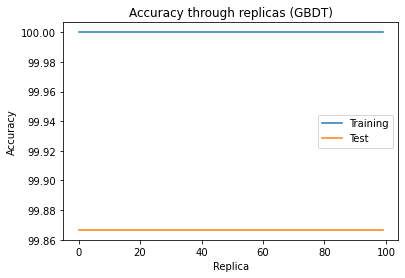

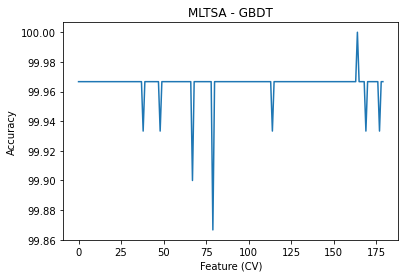

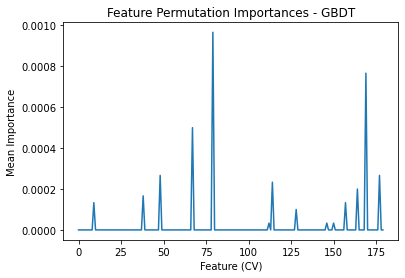

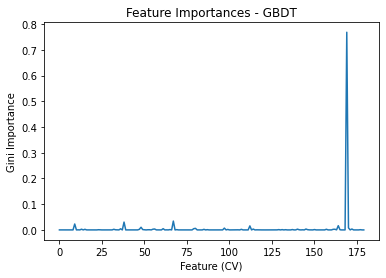

In [62]:
acc = np.array(results_GB["acc"])
adrop = np.array(results_GB["MLTSA"])
permut = np.array(results_GB["Perm"])
permut = [x.importances_mean for x in permut]
imp = np.array(results_GB["Imp"])

plt.figure()
plt.title("Accuracy through replicas (GBDT)")
plt.plot(acc.T[0]*100, label="Training")
plt.plot(acc.T[1]*100, label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - GBDT")
plt.plot(mean)
plt.fill_between(np.arange(len(std)), y1=(mean+std), y2=(mean-std))
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

plt.figure()
plt.title("Feature Permutation Importances - GBDT")
plt.plot(np.mean(permut, axis=0))
plt.ylabel("Mean Importance")
plt.xlabel("Feature (CV)")

plt.figure()
plt.title("Feature Importances - GBDT")
plt.plot(np.mean(imp, axis=0))
plt.ylabel("Gini Importance")
plt.xlabel("Feature (CV)")

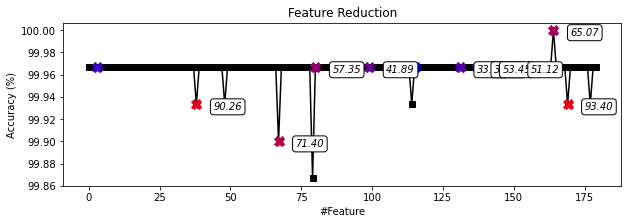

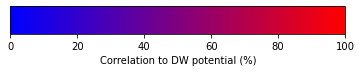

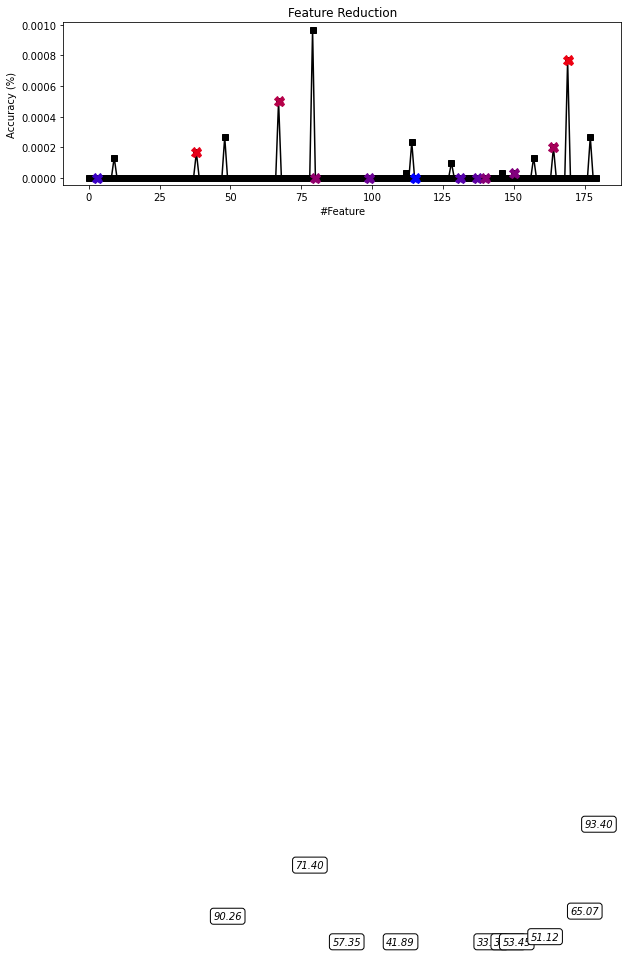

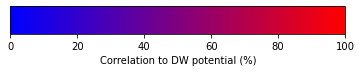

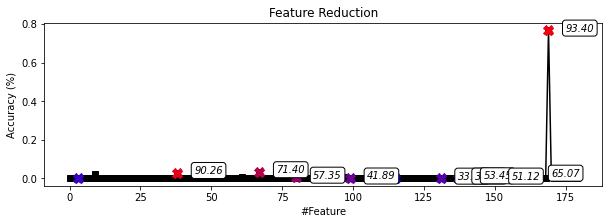

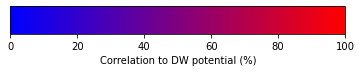

In [63]:
MLTSA_Plot(adrop, oneD_dataset, pots, errorbar=False)

MLTSA_Plot(np.array(permut)/100, oneD_dataset, pots, errorbar=False)

MLTSA_Plot(imp/100, oneD_dataset, pots, errorbar=False)

array([-3.00000000e-04, -4.66666667e-04, -5.33333333e-04,  3.66666667e-04,
       -1.66666667e-04,  0.00000000e+00, -8.66666667e-04, -2.00000000e-04,
       -7.66666667e-04, -5.33333333e-04, -3.33333333e-04, -7.33333333e-04,
       -3.33333333e-05, -5.00000000e-04,  3.33333333e-05, -2.00000000e-04,
       -8.00000000e-04, -2.00000000e-04,  0.00000000e+00, -1.26666667e-03,
        1.76666667e-03,  2.00000000e-04,  1.66666667e-04,  0.00000000e+00,
        0.00000000e+00,  2.00000000e-04, -8.66666667e-04,  1.33333333e-04,
       -6.66666667e-05, -1.03333333e-03, -7.00000000e-04,  3.33333333e-05,
       -6.33333333e-04, -4.33333333e-04,  1.33333333e-04, -3.00000000e-04,
       -3.33333333e-04, -5.00000000e-04,  7.10000000e-03, -4.66666667e-04,
        2.00000000e-04, -3.33333333e-05, -1.16666667e-03,  3.33333333e-05,
       -4.00000000e-04, -6.66666667e-04, -1.20000000e-03,  3.33333333e-05,
       -2.00000000e-04, -9.00000000e-04,  3.66666667e-04,  2.33333333e-04,
       -3.00000000e-04, -

Text(0.5, 0, '$\\alpha y^{*} + (1-\\alpha)y$')

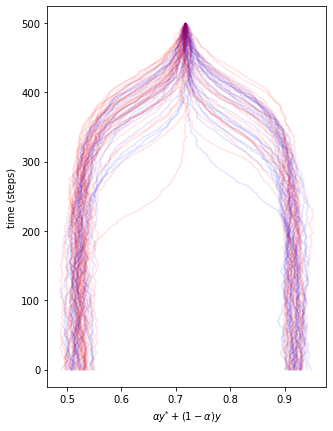

Shape of X is: (3000, 180)
Shape of Y is: (3000,)
X and Y have the same length: True


Accuracy on Train is 91.2
Accuracy on Test set is 91.33333333333333
Trained in  6.1915647983551025 seconds


Generating dataset


Running Simulations: 100%|#############################################################| 25/25 [00:06<00:00,  3.88it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|#########################################################| 25/25 [00:00<?, ?it/s]

Validation Accuracy is 89.06666666666668


In [29]:
from MLTSA_sklearn.MLTSA_sk import MLTSA

#We Call the method on the data, labels and trained NN.
ADrop_train_avg = MLTSA(data[:,:,time_frame[0]:time_frame[1]], ans, trained_NN, drop_mode="Average")


100it [00:07, 13.90it/s]


(90.62833333333333, 91.47166666666669)

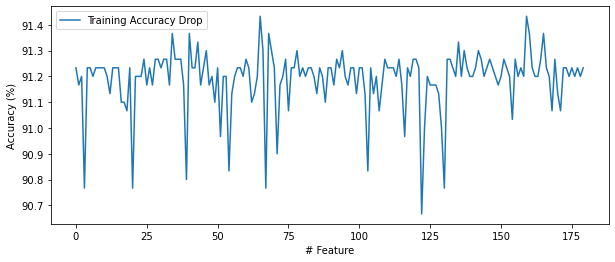

In [30]:
plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.legend()
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
plt.ylim()

C:\Users\k1802891\Anaconda3\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\k1802891\Anaconda3\lib\site-packages\numpy\core\_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\k1802891\Anaconda3\lib\site-packages\MLTSA_sklearn\MLTSA_sk.py:100: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dat, "-o", color="black", marker="s")


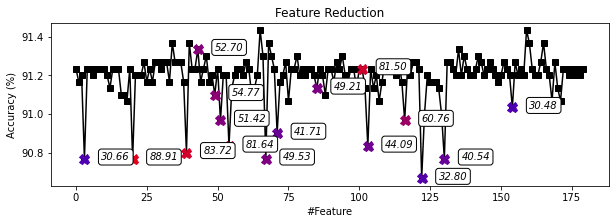

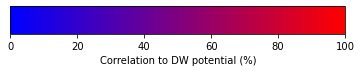

In [31]:
from MLTSA_sklearn.MLTSA_sk import MLTSA_Plot

#We simply get the plot with this
MLTSA_Plot([ADrop_train_avg], oneD_dataset, pots, errorbar=False)

This plots shows the accuracy drop for every single feature after swapping them with their global mean accross simulations. The features highlighted with a coloured cross are correlated features having red as the most correlated (100%) and blue as the least (0%).